In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
%matplotlib inline

In [23]:
N = 1000
x = np.random.random((N,4))
y = 0.25 + x[:,0] - x[:,1] + 0.75 * x[:,2]
print(x.shape, y.shape)
print(x[:10,:2])
print(y[:10])

(1000, 4) (1000,)
[[0.95221495 0.29308106]
 [0.72118784 0.7700497 ]
 [0.75923352 0.78367015]
 [0.4861968  0.0798361 ]
 [0.11255063 0.87594453]
 [0.47795432 0.96937536]
 [0.30919577 0.94112739]
 [0.75413114 0.00884138]
 [0.54947232 0.19212962]
 [0.75315609 0.54172984]]
[ 0.92297072  0.42475443  0.32055767  1.05633175 -0.40985226  0.33763952
 -0.22663787  1.28581328  0.78515429  0.98024109]


In [24]:
def create_model():
    keras.backend.clear_session()
    model = keras.models.Sequential([
        keras.layers.Dense(1,input_shape=(4,))
    ])
    model.summary()
    model.compile(loss="mse", metrics="mae", optimizer="adam")
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
Epoch 164: early stopping
             loss       mae      val_loss   val_mae
159  2.540099e-09  0.000041  1.996778e-09  0.000037
160  1.680197e-09  0.000033  1.322665e-09  0.000030
161  1.099845e-09  0.000027  8.722094e-10  0.000024
162  7.170675e-10  0.000022  5.521218e-10  0.000019
163  4.618540e-10  0.000017  3.539968e-10  0.000016


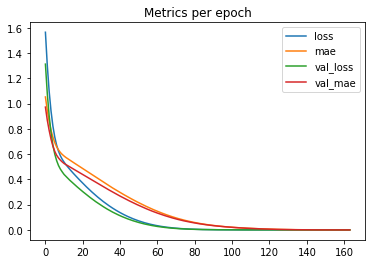

In [27]:
model = create_model()
es = keras.callbacks.EarlyStopping(min_delta=10e-9, patience=5, verbose=1)
hist = model.fit(x,y,batch_size=16,epochs=200, verbose=0,callbacks=[es], validation_split=0.2)
hdf = pd.DataFrame(hist.history)
print(hdf.tail(5))
_=hdf.plot(title="Metrics per epoch")

In [28]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[ 9.9995869e-01],
        [-1.0000325e+00],
        [ 7.4996817e-01],
        [-2.5547868e-05]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.25006732], dtype=float32)>]